<a href="https://colab.research.google.com/github/Jaiha017/Data_Acquisition/blob/main/Fish_unsupervised_alogrithims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [109]:
from google.colab import files
uploaded = files.upload()

Saving fish.csv to fish (3).csv


In [110]:
df_fish = pd.read_csv('/content/fish.csv')
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [111]:
df_fish.shape

(84, 7)

In [112]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [113]:
df_fish.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [114]:
df_fish.duplicated

<bound method DataFrame.duplicated of     Bream   242.0  23.2  25.4  30.0  38.4  13.4
0   Bream   290.0  24.0  26.3  31.2  40.0  13.8
1   Bream   340.0  23.9  26.5  31.1  39.8  15.1
2   Bream   363.0  26.3  29.0  33.5  38.0  13.3
3   Bream   430.0  26.5  29.0  34.0  36.6  15.1
4   Bream   450.0  26.8  29.7  34.7  39.2  14.2
..    ...     ...   ...   ...   ...   ...   ...
79   Pike   950.0  48.3  51.7  55.1  16.2  11.2
80   Pike  1250.0  52.0  56.0  59.7  17.9  11.7
81   Pike  1600.0  56.0  60.0  64.0  15.0   9.6
82   Pike  1550.0  56.0  60.0  64.0  15.0   9.6
83   Pike  1650.0  59.0  63.4  68.0  15.9  11.0

[84 rows x 7 columns]>

In [115]:
df_fish.nunique()

,0
Bream,4
242.0,65
23.2,71
25.4,61
30.0,71
38.4,68
13.4,45


In [116]:
df_fish.isna().sum()

,0
Bream,0
242.0,0
23.2,0
25.4,0
30.0,0
38.4,0
13.4,0


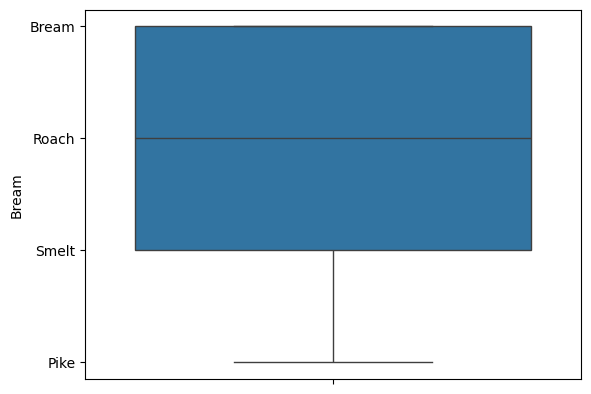

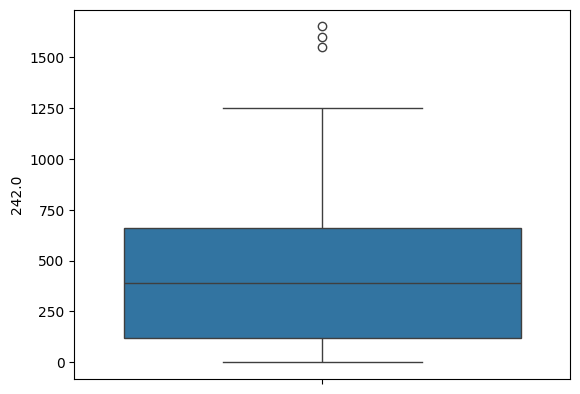

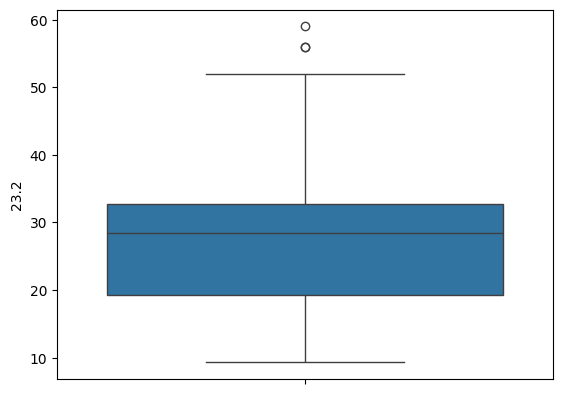

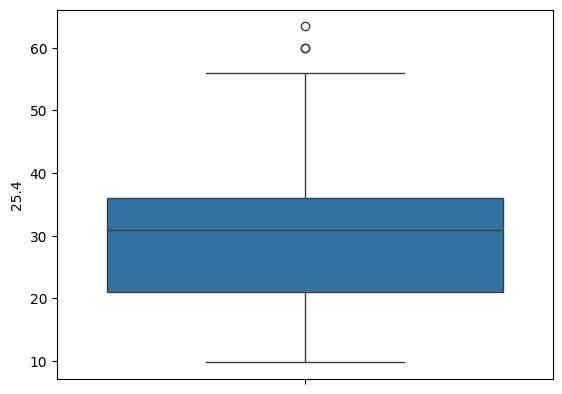

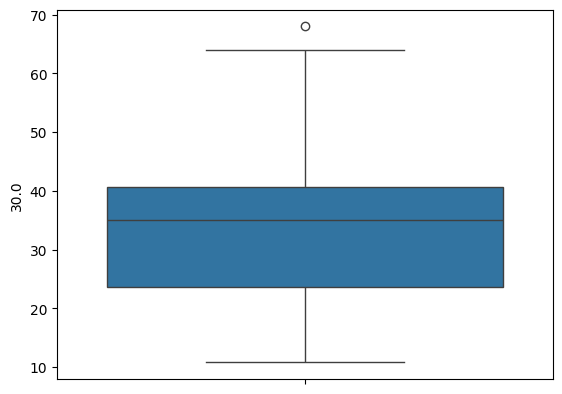

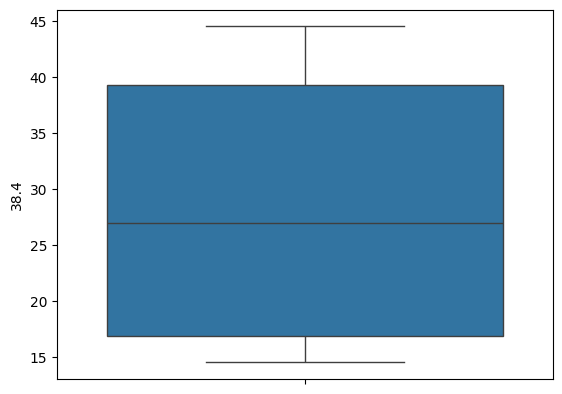

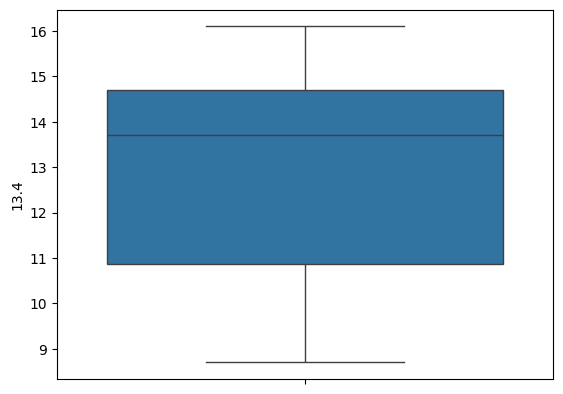

In [117]:
for i in df_fish.columns:
  sns.boxplot(data = df_fish[i])
  plt.show()

In [118]:
Q1 = df_fish['242.0'].quantile(0.25)
Q3 = df_fish['242.0'].quantile(0.75)

IQR = Q3-Q1
Low_limit = Q1 - 1.5*IQR
Up_limit = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Low_limit, Up_limit)

120.0 657.5 537.5 -686.25 1463.75


In [119]:
outliers = []
for i in df_fish['242.0']:
  if i < Low_limit or i > Up_limit:
    outliers.append(i)

print(outliers)

[1600.0, 1550.0, 1650.0]


In [120]:
df_fish['242.0'] = df_fish['242.0'].clip(Low_limit,Up_limit)

In [121]:
Q1 = df_fish['23.2'].quantile(0.25)
Q3 = df_fish['23.2'].quantile(0.75)

IQR = Q3-Q1
Low_limit = Q1 - 1.5*IQR
Up_limit = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Low_limit, Up_limit)

19.325 32.725 13.400000000000002 -0.7750000000000021 52.825


In [122]:
outliers = []
for i in df_fish['23.2']:
  if i < Low_limit or i > Up_limit:
    outliers.append(i)

print(outliers)

[56.0, 56.0, 59.0]


In [123]:
df_fish['23.2'] = df_fish['23.2'].clip(Low_limit,Up_limit)

In [124]:
Q1 = df_fish['25.4'].quantile(0.25)
Q3 = df_fish['25.4'].quantile(0.75)

IQR = Q3-Q1
Low_limit = Q1 - 1.5*IQR
Up_limit = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Low_limit, Up_limit)

20.95 36.0 15.05 -1.6250000000000036 58.575


In [125]:
outliers = []
for i in df_fish['25.4']:
  if i < Low_limit or i > Up_limit:
    outliers.append(i)

print(outliers)

[60.0, 60.0, 63.4]


In [126]:
df_fish['25.4'] = df_fish['25.4'].clip(Low_limit,Up_limit)

In [127]:
Q1 = df_fish['30.0'].quantile(0.25)
Q3 = df_fish['30.0'].quantile(0.75)

IQR = Q3-Q1
Low_limit = Q1 - 1.5*IQR
Up_limit = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Low_limit, Up_limit)

23.55 40.675 17.124999999999996 -2.137499999999992 66.36249999999998


In [128]:
outliers = []
for i in df_fish['30.0']:
  if i < Low_limit or i > Up_limit:
    outliers.append(i)

print(outliers)

[68.0]


In [129]:
df_fish['30.0'] = df_fish['30.0'].clip(Low_limit,Up_limit)

<Axes: ylabel='30.0'>

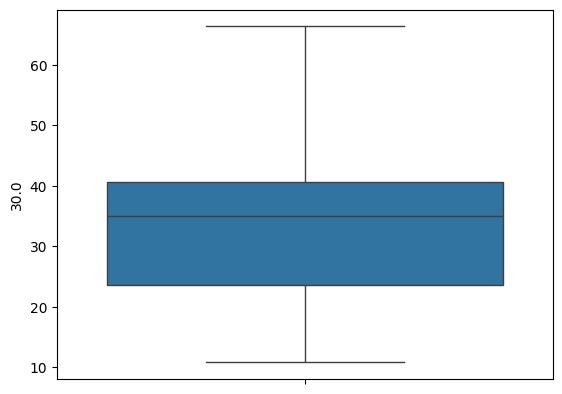

In [130]:
sns.boxplot(data=df_fish['30.0'])

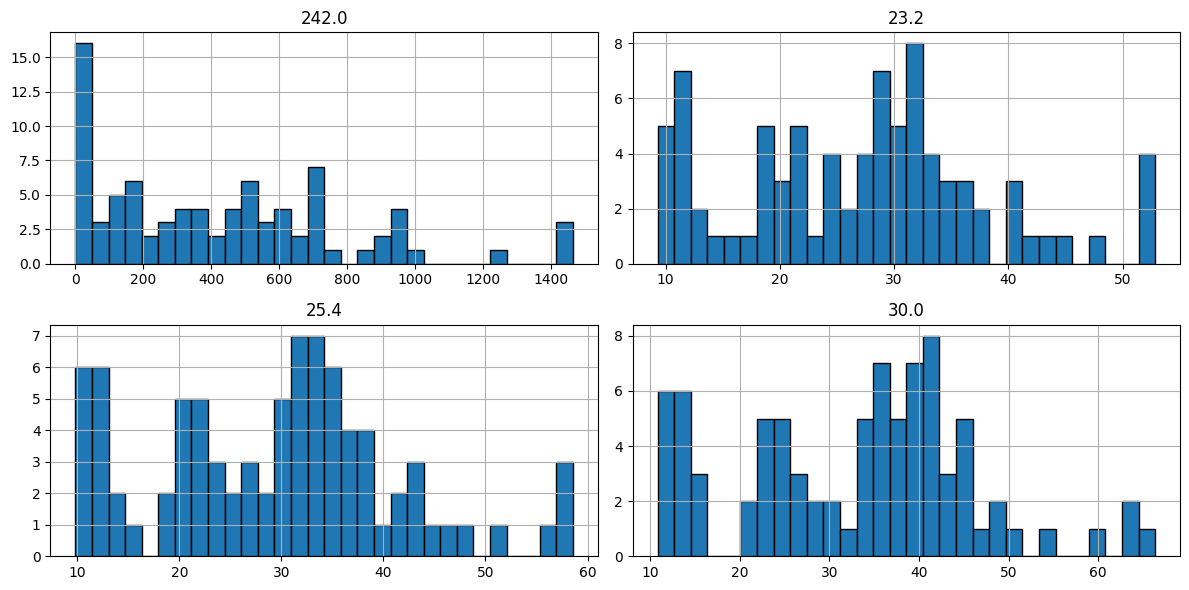

In [131]:
df_columns = ['242.0', '23.2','25.4', '30.0']

# Plot histograms for selected columns of train data set
df_fish[df_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [132]:
min_max_scale = MinMaxScaler(feature_range=(0,1))

df_fish['242.0'] = min_max_scale.fit_transform(df_fish[['242.0']])
df_fish['23.2'] = min_max_scale.fit_transform(df_fish[['23.2']])
df_fish['25.4'] = min_max_scale.fit_transform(df_fish[['25.4']])
df_fish['30.0'] = min_max_scale.fit_transform(df_fish[['30.0']])

# Preprocessing

In [133]:
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,0.198121,0.337737,0.338288,0.367154,40.0,13.8
1,Bream,0.232280,0.335439,0.342389,0.365354,39.8,15.1
2,Bream,0.247993,0.390580,0.393644,0.408549,38.0,13.3
3,Bream,0.293766,0.395175,0.393644,0.417548,36.6,15.1
4,Bream,0.307430,0.402068,0.407996,0.430146,39.2,14.2


In [134]:
X = df_fish.iloc[:,[1,6,]].values

In [135]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

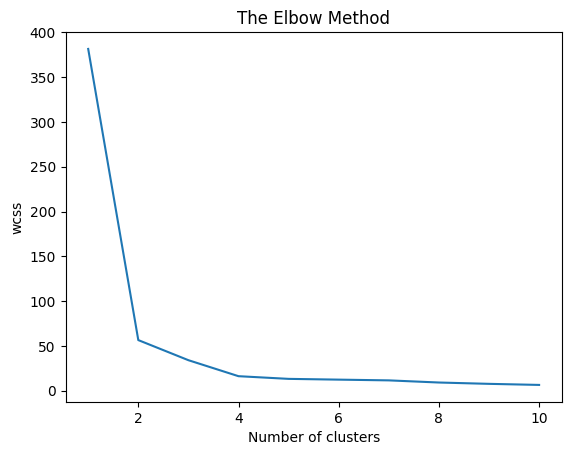

In [136]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [137]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_Kmeans = kmeans.fit_predict(X)

In [138]:
df_fish['Cluster'] = y_Kmeans
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Cluster
0,Bream,0.198121,0.337737,0.338288,0.367154,40.0,13.8,0
1,Bream,0.232280,0.335439,0.342389,0.365354,39.8,15.1,3
2,Bream,0.247993,0.390580,0.393644,0.408549,38.0,13.3,0
3,Bream,0.293766,0.395175,0.393644,0.417548,36.6,15.1,3
4,Bream,0.307430,0.402068,0.407996,0.430146,39.2,14.2,0


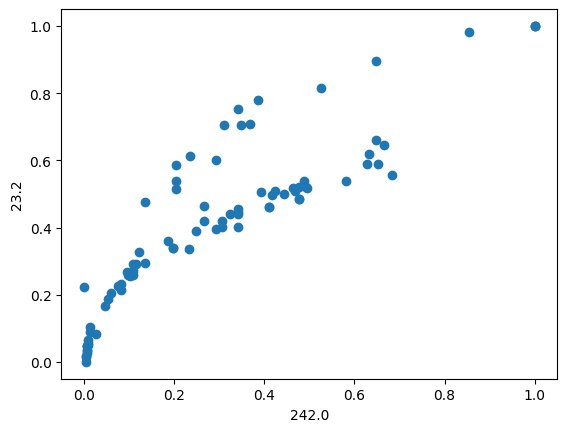

In [139]:
# before clustering
plt.scatter(df_fish['242.0'], df_fish['23.2'])
plt.xlabel('242.0')
plt.ylabel('23.2')
plt.show()

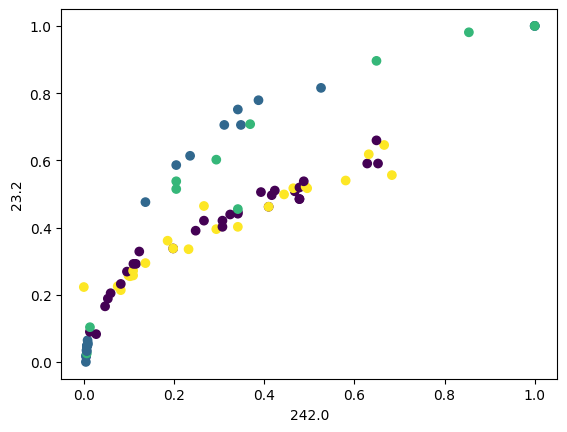

In [140]:
# after clustering
plt.scatter(df_fish['242.0'], df_fish['23.2'],c=df_fish['Cluster'])
plt.xlabel('242.0')
plt.ylabel('23.2')
plt.show()

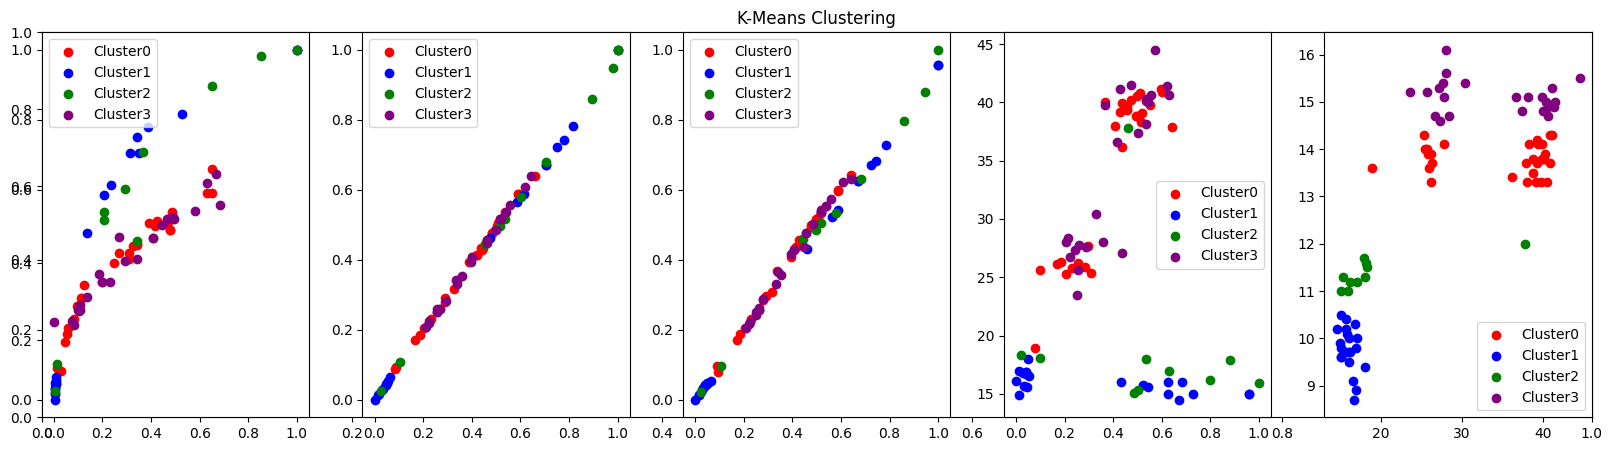

In [141]:
plt.figure(figsize=(20,5))
plt.title('K-Means Clustering')
colors = ['red', 'blue', 'green', 'purple']

#ploting 1 vs 2
plt.subplot(1,5,1)
for i in range(4):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i]['242.0'],
              df_fish[df_fish['Cluster'] == i]['23.2'],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 2 vs 3
plt.subplot(1,5,2)
for i in range(4):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i]['23.2'],
              df_fish[df_fish['Cluster'] == i]['25.4'],
              c = colors[i], label = f'Cluster{i}')
plt.legend()


#ploting 3 vs 4
plt.subplot(1,5,3)
for i in range(4):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i]['25.4'],
              df_fish[df_fish['Cluster'] == i]['30.0'],
              c = colors[i], label = f'Cluster{i}')
plt.legend()
#ploting 4 vs 5
plt.subplot(1,5,4)
for i in range(4):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i]['30.0'],
              df_fish[df_fish['Cluster'] == i]['38.4'],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 5 vs 6
plt.subplot(1,5,5)
for i in range(4):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i]['38.4'],
              df_fish[df_fish['Cluster'] == i]['13.4'],
              c = colors[i], label = f'Cluster{i}')
plt.legend()
plt.show()

In [142]:
def predict_cluster(col1, col2):
  new_data =[[col1, col2]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [143]:
predicted_cluster = predict_cluster(50,100)
print('the values belong to the cluster', predicted_cluster)

the values belong to the cluster 3


# Agglomerative Hierarchial Clustering

In [144]:
ag_cluster = linkage(X, method='ward')

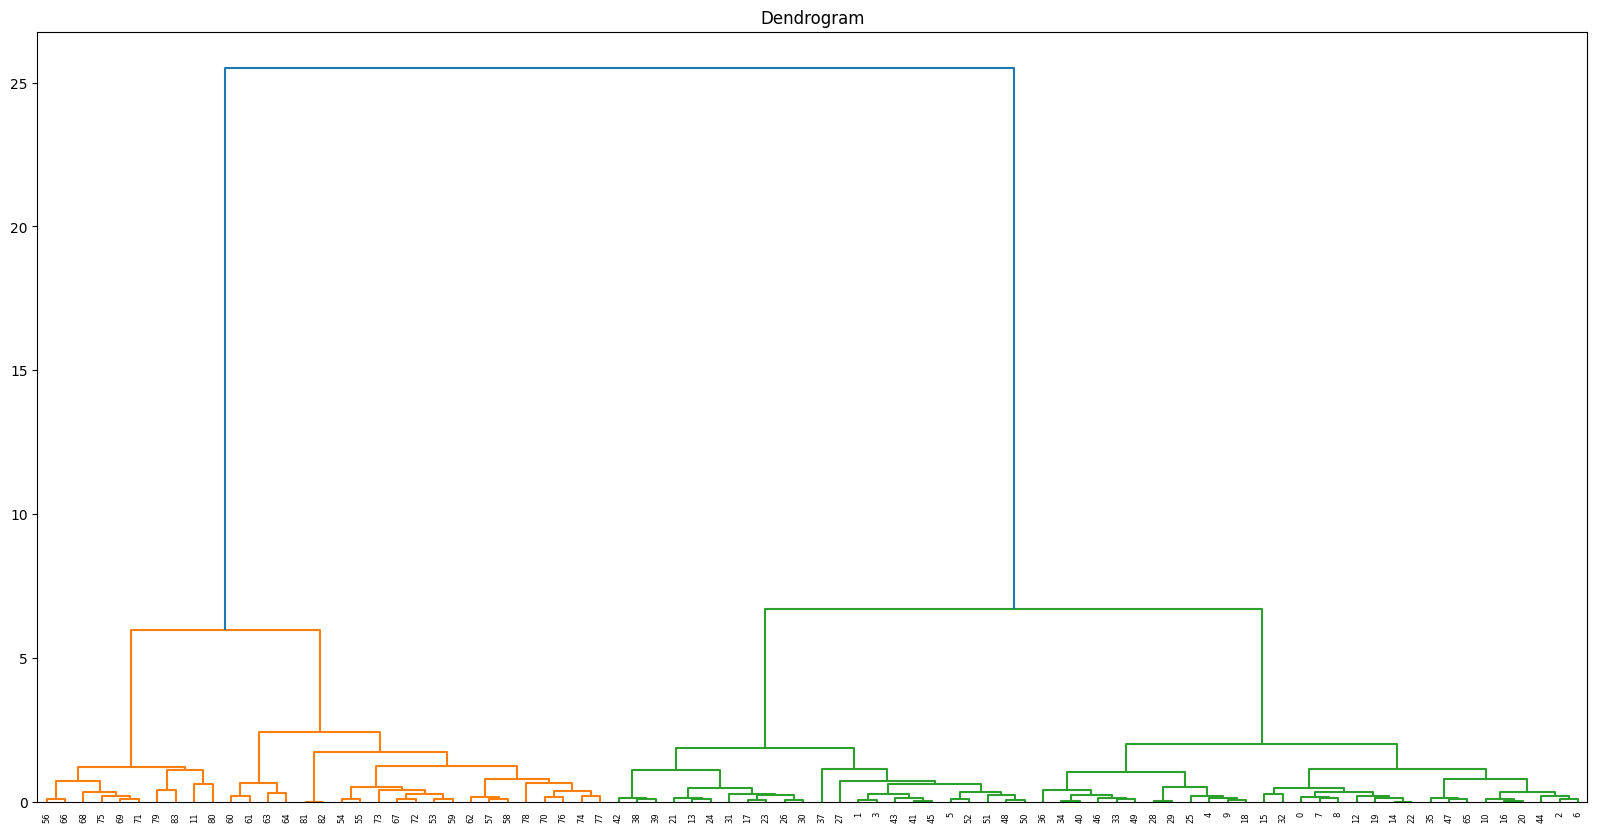

In [145]:
plt.figure(figsize=(20,10))
dendrogram(ag_cluster)
plt.axhline(y=200,color='y', linestyle='--')
plt.title('Dendrogram')
plt.show()

In [146]:
cluster_labels = fcluster(ag_cluster, t=200, criterion='distance')
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [147]:
df_fish['cluster_Agglomerative']=cluster_labels
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Cluster,cluster_Agglomerative
0,Bream,0.198121,0.337737,0.338288,0.367154,40.0,13.8,0,1
1,Bream,0.232280,0.335439,0.342389,0.365354,39.8,15.1,3,1
2,Bream,0.247993,0.390580,0.393644,0.408549,38.0,13.3,0,1
3,Bream,0.293766,0.395175,0.393644,0.417548,36.6,15.1,3,1
4,Bream,0.307430,0.402068,0.407996,0.430146,39.2,14.2,0,1


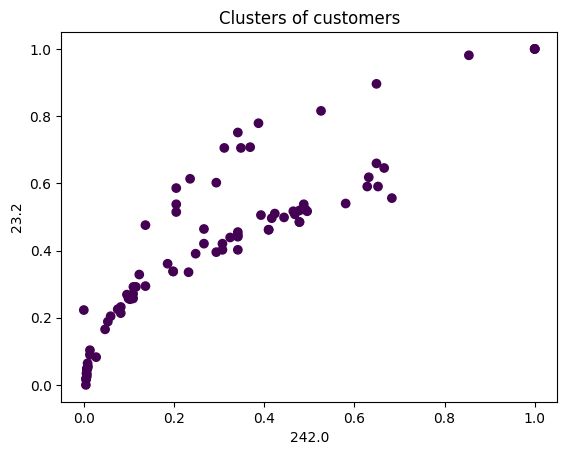

In [148]:
plt.scatter(df_fish['242.0'], df_fish['23.2'],
            c = df_fish['cluster_Agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('242.0')
plt.ylabel('23.2')
plt.show()

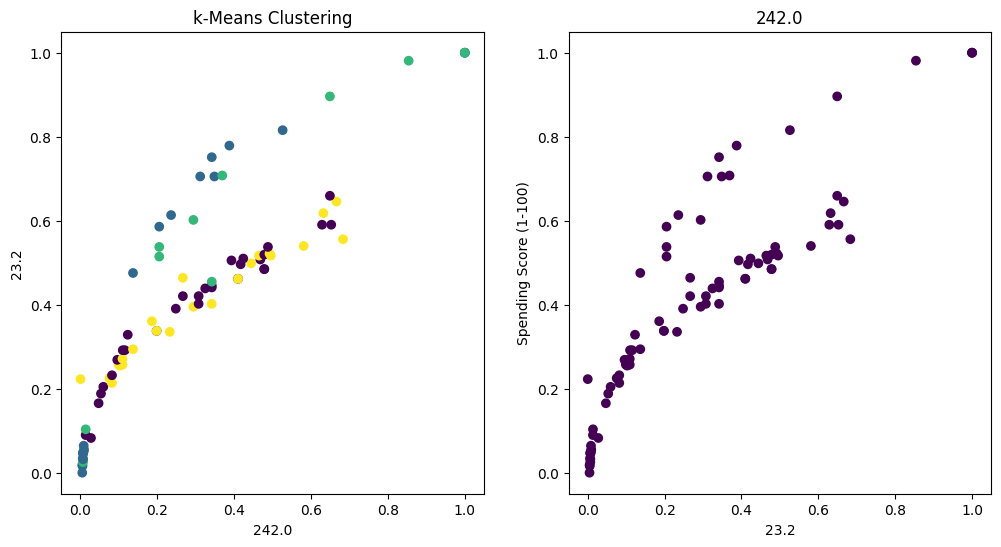

In [149]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c=df_fish['Cluster'])
plt.title('k-Means Clustering')
plt.xlabel('242.0')
plt.ylabel('23.2')

plt.subplot(1,2,2)
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c=df_fish['cluster_Agglomerative'])
plt.title('242.0')
plt.xlabel('23.2')
plt.ylabel('Spending Score (1-100)')

plt.show()